In [ ]:
"""!pip install pyyaml==5.4.1
!pip install darts
!pip install --upgrade https://github.com/dr-prodigy/python-holidays/tarball/beta
"""

In [ ]:
"""!pip uninstall matplotlib
!pip install matplotlib==3.1.3"""

In [ ]:

from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import TransformerModel
from darts.metrics import mape, smape

from darts.dataprocessing.transformers import Scaler
from darts import TimeSeries

import pandas as pd
from darts import TimeSeries

In [ ]:


#df = pd.read_csv('/content/drive/MyDrive/btc_tweet_sentiment/btc-sent-new.csv')

df = pd.read_csv('/content/drive/MyDrive/btc_tweet_sentiment/btc-sent-f2.csv')

df.time = pd.to_datetime(df.time)
df = df.set_index('time')
df = df.sort_index()
df = df.astype('float')

df['timestamp'] = df.index.tz_localize(None)

In [ ]:
df.tail()

,compound,neg,pos,weighted_comp,weighted_neg,weighted_pos,count,open,timestamp
time,,,,,,,,,
2022-05-31 20:00:00+00:00,0.148867,0.055267,0.111987,0.572387,0.542843,0.586214,1821.0,31598.65,2022-05-31 20:00:00
2022-05-31 21:00:00+00:00,0.157073,0.054286,0.118455,0.572558,0.540395,0.581562,1607.0,31794.64,2022-05-31 21:00:00
2022-05-31 22:00:00+00:00,0.150881,0.054452,0.114854,0.570143,0.540546,0.578717,1643.0,31691.51,2022-05-31 22:00:00
2022-05-31 23:00:00+00:00,0.136998,0.063979,0.118941,0.560677,0.544920,0.576188,1446.0,31852.55,2022-05-31 23:00:00
2022-06-01 00:00:00+00:00,0.129303,0.070754,0.124366,0.565354,0.545701,0.584921,1710.0,31784.18,2022-06-01 00:00:00


In [ ]:
df.head()

,compound,neg,pos,weighted_comp,weighted_neg,weighted_pos,count,open,timestamp
time,,,,,,,,,
2021-11-30 01:00:00+00:00,0.230355,0.044723,0.129183,0.596821,0.531678,0.581381,2265.0,57771.85,2021-11-30 01:00:00
2021-11-30 02:00:00+00:00,0.238187,0.041932,0.129963,0.593775,0.535233,0.584588,1920.0,57342.23,2021-11-30 02:00:00
2021-11-30 03:00:00+00:00,0.195387,0.047686,0.118205,0.581798,0.533827,0.574934,1895.0,57422.98,2021-11-30 03:00:00
2021-11-30 04:00:00+00:00,0.229451,0.043506,0.122816,0.604458,0.529832,0.580733,1858.0,57149.33,2021-11-30 04:00:00
2021-11-30 05:00:00+00:00,0.180722,0.053008,0.118401,0.578368,0.534701,0.574109,2036.0,57258.68,2021-11-30 05:00:00


In [ ]:
len(df)*0.25

1098.0

In [ ]:
series_neg = TimeSeries.from_dataframe(df, 'timestamp', 'weighted_comp')

neg_scaled = Scaler()
series_neg_scaled = neg_scaled.fit_transform(series_neg)

neg_train, neg_val = series_neg_scaled[:-1000], series_neg_scaled[-1000:]

In [ ]:
series_open = TimeSeries.from_dataframe(df, 'timestamp', 'open')

open_scaled = Scaler()
series_open_scaled = open_scaled.fit_transform(series_open)

open_train, open_val = series_open_scaled[:-1000], series_open_scaled[-1000:]

In [ ]:
series_compound = TimeSeries.from_dataframe(df, 'timestamp', 'compound')

compound_scaled = Scaler()
series_compound_scaled = compound_scaled.fit_transform(series_compound)

compound_train, compound_val = series_compound_scaled[:-1000], series_compound_scaled[-1000:]

added on model2

In [ ]:
series_weighted_comp = TimeSeries.from_dataframe(df, 'timestamp', 'weighted_comp')

weighted_comp_scaled = Scaler()
series_weighted_comp_scaled = weighted_comp_scaled.fit_transform(series_weighted_comp)

weighted_comp_train, weighted_comp_val = series_weighted_comp_scaled[:-1000], series_weighted_comp_scaled[-1000:]

In [ ]:
series_weighted_neg = TimeSeries.from_dataframe(df, 'timestamp', 'weighted_neg')

weighted_neg_scaled = Scaler()
series_weighted_neg_scaled = weighted_neg_scaled.fit_transform(series_weighted_neg)

weighted_neg_train, weighted_neg_val = series_weighted_neg_scaled[:-1000], series_weighted_neg_scaled[-1000:]

In [ ]:
series_weighted_pos = TimeSeries.from_dataframe(df, 'timestamp', 'weighted_pos')

weighted_pos_scaled = Scaler()
series_weighted_pos_scaled = weighted_pos_scaled.fit_transform(series_weighted_pos)

weighted_pos_train, weighted_pos_val = series_weighted_pos_scaled[:-1000], series_weighted_pos_scaled[-1000:]

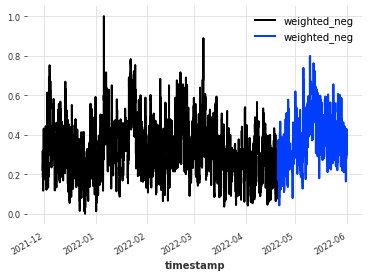

In [ ]:
import matplotlib.pyplot as plt


weighted_neg_train.plot()
weighted_neg_val.plot()

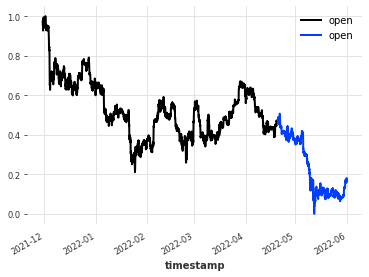

In [ ]:
import matplotlib.pyplot as plt


open_train.plot()
open_val.plot()

In [ ]:
mx = TransformerModel.load_model('/content/drive/MyDrive/rz-transformer/model1.pth.tar')

/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (_ResultMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)


In [ ]:
model = TransformerModel(input_chunk_length=24, output_chunk_length=12, n_epochs=46, random_state=0)

In [ ]:
model.fit([open_train,compound_train,neg_train,weighted_comp_train,weighted_neg_train,weighted_neg_train], verbose=True)

[2022-06-06 23:12:46,097] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 20142 samples.
[2022-06-06 23:12:46,097] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 20142 samples.
2022-06-06 23:12:46 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 20142 samples.
[2022-06-06 23:12:46,132] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-06-06 23:12:46,132] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-06-06 23:12:46 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
[2022-06-06 23:12:46,141] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Li

Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (_ResultMetric). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)


In [ ]:
model.save_model('/content/drive/MyDrive/rz-transformer/model5.pth.tar')

In [ ]:
model = 

In [ ]:
pred = model.predict(n=32, series=open_val[:-32])


In [ ]:
pred = model.predict(n=32, series=open_val[:-32])
print('MAPE = {:.2f}%'.format(mape(pred,open_val)))

In [ ]:
pred = model.predict(n=32, series=open_train)
print('MAPE = {:.2f}%'.format(mape(pred,open_val)))

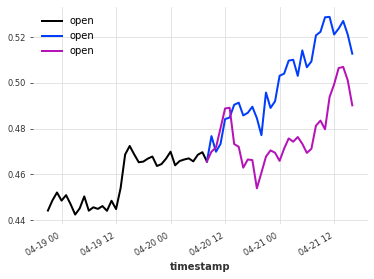

In [ ]:
open_train[-36:].plot()
open_train[-1].append(pred).plot()
open_train[-1].append(open_val[:32]).plot()